Session 2 Homework Solution
========================

## Exercise 1

In the first class, we examined a dataset containing molecular descriptors and the results from the ESOL solubility model. In this homework, we are going to use the `tabula` library to extract a table from the associated paper. In your `pdf` folder, you have a file called `Delaney_paper.pdf`. Your task for this homework is to pull information from table 4 and create plots using seaborn showing  the correlation between the various solubility models and the experimental values.

Using the file `pdfs/Delaney_paper.pdf` and `tabula-py`, read in the data from Table 4. Save this file in your data folder as `delaney_table4.csv`.

In [1]:
import tabula
import pandas as pd
import seaborn as sns

In [2]:
import tabula

table1 = tabula.read_pdf('pdfs/Delaney_paper.pdf', pages=[4])

Got stderr: Jan 07, 2023 1:32:56 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider loadDiskCache
Jan 07, 2023 1:32:56 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Jan 07, 2023 1:32:56 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Jan 07, 2023 1:32:56 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Jan 07, 2023 1:32:56 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Jan 07, 2023 1:32:56 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Jan 07, 2023 1:32:58 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



In [3]:
df = table1[0]

In [4]:
df.head()

,Unnamed: 0,Unnamed: 1,experimental,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,common name,CAS no.,"values4,28",ESOL,Liu7,Huuskonen6,Kuhne3,Wegner11,Gasteiger 10,Tetko8,GSE
1,antipyrine,60-80-0,-0.56,-1.79,-1.41,-1.29,-1.9,-1.74,-1.31,-0.89,-0.56
2,aspirin,50-78-2,-1.72,-1.98,-2.1,-1.69,-1.93,-1.81,-1.87,-1.81,-1.62
3,atrazine,1912-24-9,-3.85,-2.95,-1.51,-3.51,-3.95,-2.82,-3.83,-3.7,-3.5
4,benzocaine,94-09-7,-2.32,-2.38,-1.45,-1.79,NaN,-2.05,-2.19,-1.63,-2.06


In [5]:
df.to_csv("data/delaney_table4.csv", index=False)

## Exercise 2

Read in your saved data and clean the table using pandas.

- Rename the columns to have easy and descriptive names.
- Use `pd.to_numeric` with the appropriate options to cast columns to floats.
- Drop rows or columns if necessary.

Your dataframe should have the following column names before you save it:

```
['common name', 'CAS no.', 'experimental values', 'ESOL', 'Liu',
       'Huuskonen', 'Kuhne', 'Wegner', 'Gasteiger', 'Tetko', 'GSE']
```

Save your cleaned dataframe as `delaney_table4_clean.csv`


In [6]:
df = pd.read_csv("data/delaney_table4.csv")

df.head()

,Unnamed: 0,Unnamed: 1,experimental,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,common name,CAS no.,"values4,28",ESOL,Liu7,Huuskonen6,Kuhne3,Wegner11,Gasteiger 10,Tetko8,GSE
1,antipyrine,60-80-0,-0.56,-1.79,-1.41,-1.29,-1.9,-1.74,-1.31,-0.89,-0.56
2,aspirin,50-78-2,-1.72,-1.98,-2.1,-1.69,-1.93,-1.81,-1.87,-1.81,-1.62
3,atrazine,1912-24-9,-3.85,-2.95,-1.51,-3.51,-3.95,-2.82,-3.83,-3.7,-3.5
4,benzocaine,94-09-7,-2.32,-2.38,-1.45,-1.79,NaN,-2.05,-2.19,-1.63,-2.06


In [7]:
df.columns = ['common name', 'CAS no.', 'experimental values', 'ESOL', 'Liu',
       'Huuskonen', 'Kuhne', 'Wegner', 'Gasteiger', 'Tetko', 'GSE']

In [8]:
df.drop(index=0, inplace=True)

In [9]:
df.head()

,common name,CAS no.,experimental values,ESOL,Liu,Huuskonen,Kuhne,Wegner,Gasteiger,Tetko,GSE
1,antipyrine,60-80-0,-0.56,-1.79,-1.41,-1.29,-1.9,-1.74,-1.31,-0.89,-0.56
2,aspirin,50-78-2,-1.72,-1.98,-2.1,-1.69,-1.93,-1.81,-1.87,-1.81,-1.62
3,atrazine,1912-24-9,-3.85,-2.95,-1.51,-3.51,-3.95,-2.82,-3.83,-3.7,-3.5
4,benzocaine,94-09-7,-2.32,-2.38,-1.45,-1.79,NaN,-2.05,-2.19,-1.63,-2.06
5,chlordane,57-74-9,-6.86,-5.88,-7.32,-7.29,-6.51,-6.47,-7.66,-7.23,-5.3


In [10]:
df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, axis=1, errors="coerce")

In [11]:
df.to_csv("data/delaney_table4_clean.csv", index=False)

## Exercise 3

Use seaborn `lmplot` to create a plot showing `experimental values` vs each of the models. You should have one plot per model. Create a plot which has two columns per row.

In [12]:
df2 = pd.read_csv("data/delaney_table4_clean.csv")

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   common name          21 non-null     object 
 1   CAS no.              21 non-null     object 
 2   experimental values  21 non-null     float64
 3   ESOL                 24 non-null     float64
 4   Liu                  24 non-null     float64
 5   Huuskonen            24 non-null     float64
 6   Kuhne                22 non-null     float64
 7   Wegner               24 non-null     float64
 8   Gasteiger            24 non-null     float64
 9   Tetko                24 non-null     float64
 10  GSE                  22 non-null     float64
dtypes: float64(9), object(2)
memory usage: 2.2+ KB


In [14]:
df_melt = pd.melt(df2, id_vars="experimental values", 
                  value_vars=["ESOL", "Liu", "Huuskonen", "Kuhne", "Wegner", "Gasteiger", "Tetko", "GSE"])

In [15]:
df_melt

,experimental values,variable,value
0,-0.56,ESOL,-1.79
1,-1.72,ESOL,-1.98
2,-3.85,ESOL,-2.95
3,-2.32,ESOL,-2.38
4,-6.86,ESOL,-5.88
...,...,...,...
187,-4.09,GSE,-4.02
188,-1.39,GSE,-1.91
189,NaN,GSE,0.86
190,NaN,GSE,0.79


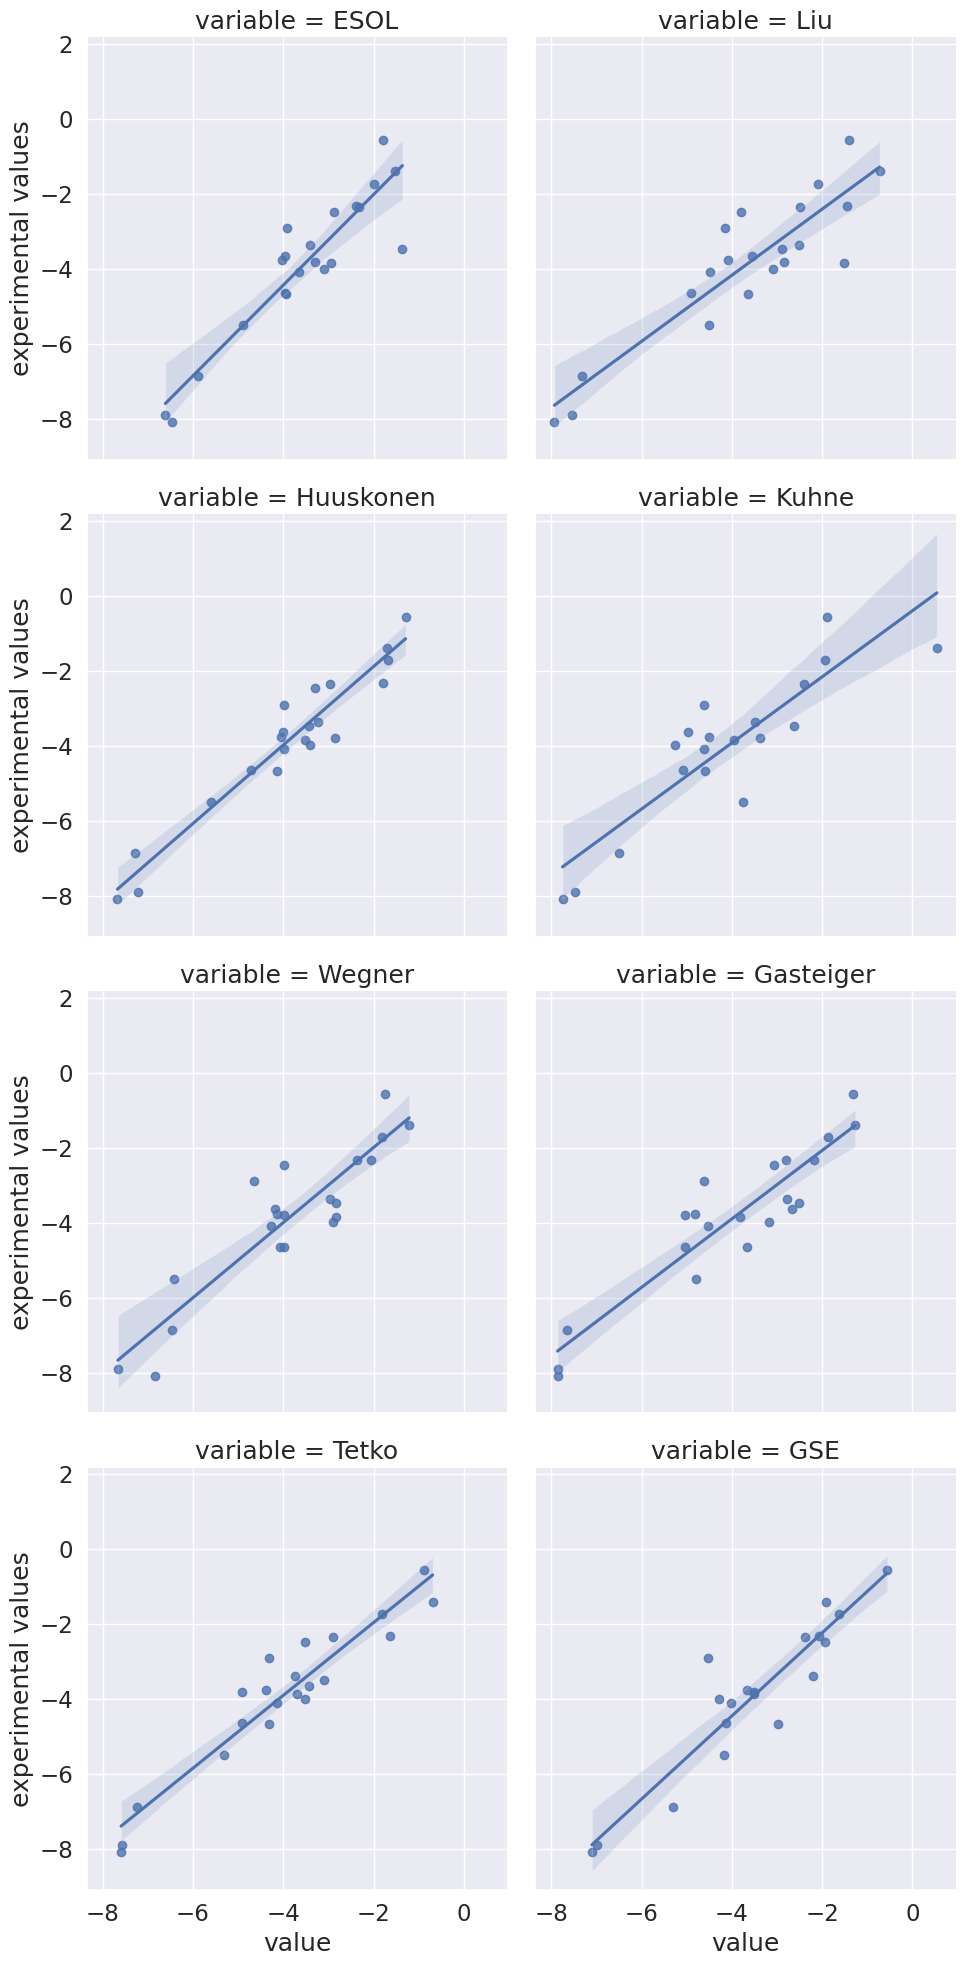

In [16]:
sns.set(font_scale=1.5)
g = sns.lmplot(data = df_melt, y="experimental values", x="value", 
               col="variable", col_wrap=2)
g.tight_layout()